In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame

business = pd.read_csv('average_business_scores.csv') 
business.head() 

business_id     anger  anticipation   disgust      fear  \
0  iCQpiavjjPzJ5_3gPD5Ebg  0.754110      2.720736  0.602945  0.582331   
1  pomGBqfbxcqPv14c3XH-ZQ  0.654222      2.138667  0.592889  0.655111   
2  jtQARsP6P-LbkyjbO1qNGg  1.060870      2.547826  0.921739  0.991304   
3  elqbBhBfElMNSrjFqW3now  0.552413      2.113145  0.540765  0.728785   
4  Ums3gaP2qM3W1XcA5r6SsQ  1.012448      2.282158  0.659751  0.883817   

        joy   sadness  surprise     trust  negative  positive  \
0  2.522209  0.867730  1.096687  2.991411  2.300613  4.446135   
1  3.115556  0.740444  1.024000  3.023111  1.636444  4.806222   
2  3.434783  1.313043  1.443478  3.443478  2.434783  5.834783   
3  3.314476  0.652246  1.014975  3.276206  1.379368  5.732113   
4  3.037344  0.759336  1.132780  2.887967  2.095436  4.887967   

   polarity_alternate_measure  avg_usefulness_review_rating  \
0                    2.695350                      1.468221   
1                    3.119600                      0.680000   
2                    3.223478                      1.043478   
3                    3.451747                      0.602329   
4                    3.231950                      0.771784   

   avg_funniness_review_rating  avg_coolness_review_rating  
0                     0.937669                    1.075583  
1                     0.225778                    0.316444  
2                     0.382609                    0.278261  
3                     0.236273                    0.357737  
4                     0.327801                    0.481328

In [3]:
# Assign the data to X and y

X = business[["positive", "negative", "surprise", "joy", "fear", "disgust", "anger", "avg_funniness_review_rating", 
              "avg_coolness_review_rating" ]]
y = business["avg_usefulness_review_rating"].values.reshape(-1, 1)
print(X.shape, y.shape) 

(188593, 9) (188593, 1)


In [4]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)



In [5]:
# Fit the model to the training data and calculate the scores for the training and testing data
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)



print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}") 

Training Score: 0.4214902966892735
Testing Score: 0.36546525525268025


In [6]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [7]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

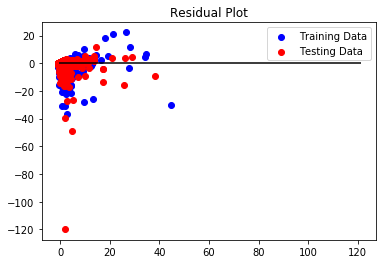

In [8]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="red", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [9]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}") 

MSE: 1.3781427268055415, R2: 0.36546525525268025


In [10]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)


print(f"MSE: {MSE}, R2: {r2}") 

MSE: 0.9274032664655859, R2: 0.3638021103699024


In [11]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge


ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)


print(f"MSE: {MSE}, R2: {r2}") 

MSE: 0.9249788552928532, R2: 0.365465254470706


In [12]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet


elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)


print(f"MSE: {MSE}, R2: {r2}")  

MSE: 0.9260383305798076, R2: 0.36473845528199456


In [33]:
from sklearn import tree
import pandas as pd
import os

In [34]:
business_data = pd.read_csv("business_data.csv")
business_data.head()

business_id       city  stars
0  Apn5Q_b6Nz61Tq4XzPdf9A    Calgary    4.0
1  AjEbIBw6ZFfln7ePHha9PA  Henderson    4.5
2  O8S5hYJ1SMc8fA4QBtVujA   Montréal    4.0
3  bFzdJJ3wp3PZssNEsyU23g    Phoenix    1.5
4  8USyCYqpScwiNEb58Bt6CA    Calgary    2.0

In [35]:
df = pd.merge(business_data, business, on="business_id")
df = df.loc[df['city'] == 'Charlotte']
df.head()

business_id       city  stars     anger  anticipation  \
57  AYL_y8ahquUW0o-cvIyLbg  Charlotte    3.5  0.447059      2.188235   
59  Aws6VX-PDsZoCw9oHpBMCg  Charlotte    2.0  0.666667      0.666667   
60  rmGQGPpk1XZFTkz-4IGHCw  Charlotte    4.0  1.000000      2.333333   
64  NzhRebtw2AIxXkVO_BrOOQ  Charlotte    2.0  1.250000      4.500000   
90  jaKf1HVjEEsSMoFvpQdMNQ  Charlotte    3.5  1.213592      3.737864   

     disgust      fear       joy   sadness  surprise     trust  negative  \
57  0.435294  0.576471  2.317647  0.517647  0.976471  2.517647  1.223529   
59  1.000000  0.333333  1.333333  0.666667  0.333333  1.333333  2.000000   
60  0.000000  1.000000  2.333333  0.666667  1.000000  3.333333  2.666667   
64  1.500000  1.000000  2.750000  0.750000  1.750000  4.750000  3.000000   
90  1.223301  2.446602  2.932039  2.650485  1.834951  4.582524  4.116505   

    positive  polarity_alternate_measure  avg_usefulness_review_rating  \
57  3.882353                    2.765882                      0.729412   
59  4.000000                    1.183333                      0.000000   
60  5.000000                    1.550000                      0.000000   
64  7.500000                    2.850000                      0.750000   
90  6.864078                    3.086408                      1.854369   

    avg_funniness_review_rating  avg_coolness_review_rating  
57                     0.270588                    0.223529  
59                     0.000000                    0.000000  
60                     0.000000                    0.000000  
64                     0.500000                    0.000000  
90                     0.300971                    0.233010

In [36]:
df = df.drop(["business_id", "city", "polarity_alternate_measure", "avg_usefulness_review_rating", "avg_funniness_review_rating",
             "avg_coolness_review_rating","positive","negative"], axis = 1)
df.head()

stars     anger  anticipation   disgust      fear       joy   sadness  \
57    3.5  0.447059      2.188235  0.435294  0.576471  2.317647  0.517647   
59    2.0  0.666667      0.666667  1.000000  0.333333  1.333333  0.666667   
60    4.0  1.000000      2.333333  0.000000  1.000000  2.333333  0.666667   
64    2.0  1.250000      4.500000  1.500000  1.000000  2.750000  0.750000   
90    3.5  1.213592      3.737864  1.223301  2.446602  2.932039  2.650485   

    surprise     trust  
57  0.976471  2.517647  
59  0.333333  1.333333  
60  1.000000  3.333333  
64  1.750000  4.750000  
90  1.834951  4.582524

In [37]:
for index, row in df.iterrows():
    if (row["stars"] > 3):
        row["stars"] = 1
    else:
        row["stars"] = 0
    row["anger"] = round (row["anger"],1)
    row["anticipation"] = round (row["anticipation"],1) 
    row["disgust"] = round (row["disgust"],1) 
    row["fear"] = round (row["fear"],1) 
    row["joy"] = round (row["joy"],1) 
    row["sadness"] = round (row["sadness"],1) 
    row["surprise"] = round (row["surprise"],1) 
    row["trust"] = round (row["trust"],1) 
    
    
    
df.head()

stars  anger  anticipation  disgust  fear  joy  sadness  surprise  trust
57    1.0    0.4           2.2      0.4   0.6  2.3      0.5       1.0    2.5
59    0.0    0.7           0.7      1.0   0.3  1.3      0.7       0.3    1.3
60    1.0    1.0           2.3      0.0   1.0  2.3      0.7       1.0    3.3
64    0.0    1.2           4.5      1.5   1.0  2.8      0.8       1.8    4.8
90    1.0    1.2           3.7      1.2   2.4  2.9      2.7       1.8    4.6

In [38]:
target = df["stars"]
target_names = ["negative", "positive"]

In [39]:
data = df
data = df.drop("stars", axis=1)
feature_names = data.columns
data.head() 

anger  anticipation  disgust  fear  joy  sadness  surprise  trust
57    0.4           2.2      0.4   0.6  2.3      0.5       1.0    2.5
59    0.7           0.7      1.0   0.3  1.3      0.7       0.3    1.3
60    1.0           2.3      0.0   1.0  2.3      0.7       1.0    3.3
64    1.2           4.5      1.5   1.0  2.8      0.8       1.8    4.8
90    1.2           3.7      1.2   2.4  2.9      2.7       1.8    4.6

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42) 

In [41]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train.astype('int'))
clf.score(X_test, y_test.astype('int')) 

0.69714285714285718

In [42]:
# WARNING! BOILERPLATE CODE HERE! 
# Use this to visualize the tree
import graphviz 
dot_data = tree.export_graphviz(
    clf, out_file=None, 
    feature_names=feature_names,  
    class_names=target_names,  
    filled=True, rounded=True,  
    special_characters=True)  

graph = graphviz.Source(dot_data)  
graph 

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train.astype('int'))
rf.score(X_test, y_test.astype('int')) 

0.7846153846153846

In [44]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)  

[(0.18275030688191851, 'disgust'),
 (0.14475827126164337, 'joy'),
 (0.12999139692715322, 'anger'),
 (0.12198279245245336, 'trust'),
 (0.11806169150282191, 'sadness'),
 (0.10757929105561988, 'anticipation'),
 (0.10479178164013771, 'fear'),
 (0.090084468278252172, 'surprise')]

In [45]:
tree.export_graphviz(clf, out_file='tree.dot')  